In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load our data

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# store our data in variable X
X = iris.data; X.shape
# Keep only the first two features: sepal length (cm) and sepal width (cm)
X = X[:,:2]; X.shape

# preprocess the data (Step 0)
def normalize(x,axis):
    return (x-x.mean(axis))/x.std(axis)
X = normalize(X,0)

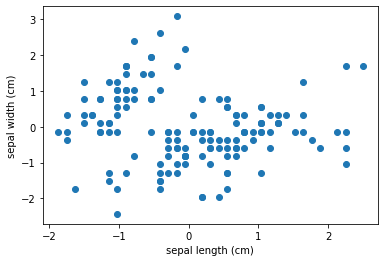

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# Load Kmeans

K-Means Algorithm:

- **Step 1** - Pick K random points as cluster centers called centroids.
- **Step 2** - Assign each x to the nearest cluster by calculating its distance to each centroid (Euclidean).
- **Step 3** - Find the new cluster center by taking the average of the assigned points.
- **Step 4** - Repeat Step 2 and 3 for a given number of iterations or until none of the cluster assignments change.

Note: typically you would use sci-kit learn's implementation. Here is what is happening under the hood in Kmeans 

In [7]:
# Implementing our own Kmeans
class KMeans:
    def __init__(self, x, clusters, iters):
        self.clusters = clusters
        self.iters = iters
        self.x = np.array(x)
        self.all_labels,self.all_centers = [],[]

    def distance(self,x1,x2):
        # euclidean distance (aka pythagorean metric, aka L2 norm)
        assert x1.shape == x2.shape, f"shapes don't match {x1.shape} != {x2.shape} "
        return math.sqrt(sum([(x1[i]-x2[i])**2 for i in range(len(x1))]))
        
    def generate_random_points(self):
        return np.random.randn(self.clusters,self.x.shape[1])
    
    def get_labels(self):
        labels = []
        for i,point in enumerate(self.x): 
            min_dist = float('inf')
            best_cluster = None
            for ic, center in enumerate(self.centers):
                dist = self.distance(point,center)
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = ic
            labels.append(best_cluster)
        return np.array(labels)
    
    def set_centers(self,i):
        if i == 0: 
            return self.generate_random_points()
        centers = []
        for j in range(self.clusters):
            m = self.x[self.labels==j].mean(0)
            centers.append(m)
        return np.array(centers)
            
    def fit(self):
        for i in range(self.iters):
            self.centers = self.set_centers(i)
            self.labels = self.get_labels() 
            # stop early if labels are not changing 
            if i > 0 and np.all(np.equal(self.labels, self.all_labels[-1])):
                return
            self.all_centers.append(self.centers)
            self.all_labels.append(self.labels)
    def predict(self,x):
        """
        predicts on new data. returns the cluster label for the points or point x.
        """
        raise NotImplementedError
            

In [8]:
X.shape

(150, 2)

In [9]:
k = KMeans(X,clusters=3,iters=50)
k.fit()

# Plot the clusters

iter 0


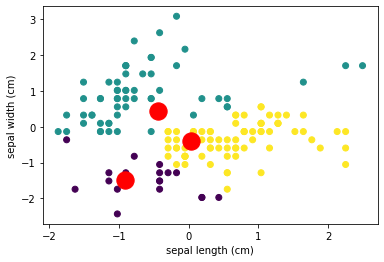

iter 1


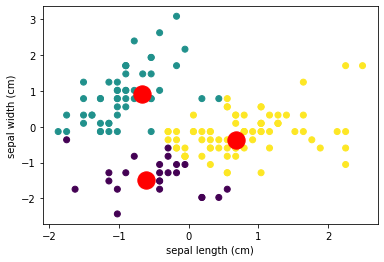

iter 2


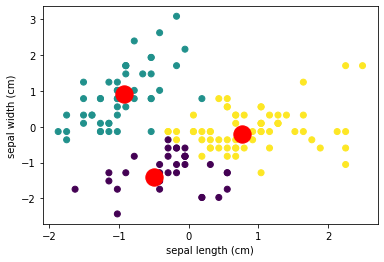

iter 3


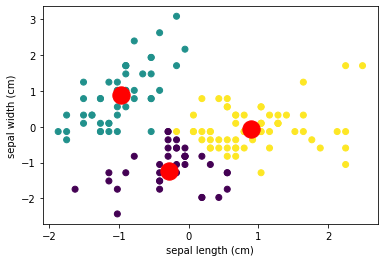

iter 4


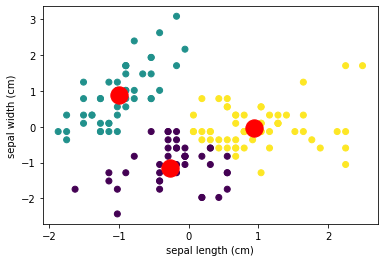

iter 5


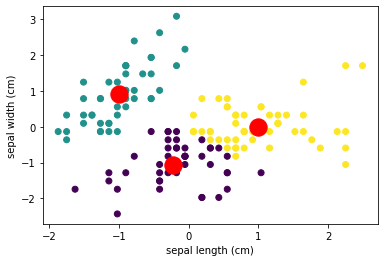

iter 6


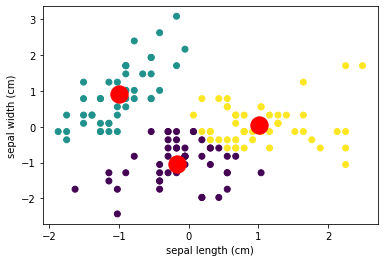

iter 7


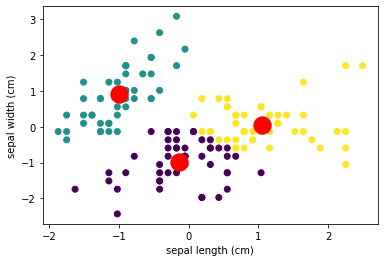

iter 8


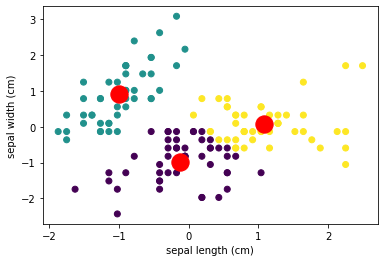

Finished in 9 iterations.


In [10]:
# draw the figure so the animations will work
fig = plt.figure()
fig.canvas.draw()
i = 0
for centers,labels in zip(k.all_centers,k.all_labels):
        print(f"iter {i}")
        plt.scatter(X[:,0],X[:,1],c=labels) # plot something
        cxs, cys = zip(*centers)
        plt.scatter(x=cxs,y=cys,s=300,marker="o",c="red")
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])
        # update canvas immediately
        plt.pause(0.01) 
        fig.canvas.draw()
        i+=1
print(f"Finished in {i} iterations.")

In [11]:
i

9

# PCA

In [12]:
def pca(x,k):
    """
    provide m x n matrix where m are examples and n are features 
    """
    x = x.T # adjusting the matrix to 
    cov = np.cov(x)
    u,_,_ = np.linalg.svd(cov)
    u = u[:,:k]
    res = u.T@x
    return res.T

In [13]:
X = iris.data

X = normalize(X,0) 

In [14]:
X.shape

(150, 4)

In [15]:
pca(X,2).shape # we have reduced our dimensions to 2.

(150, 2)

# Bucketing Categorical Features (Image)

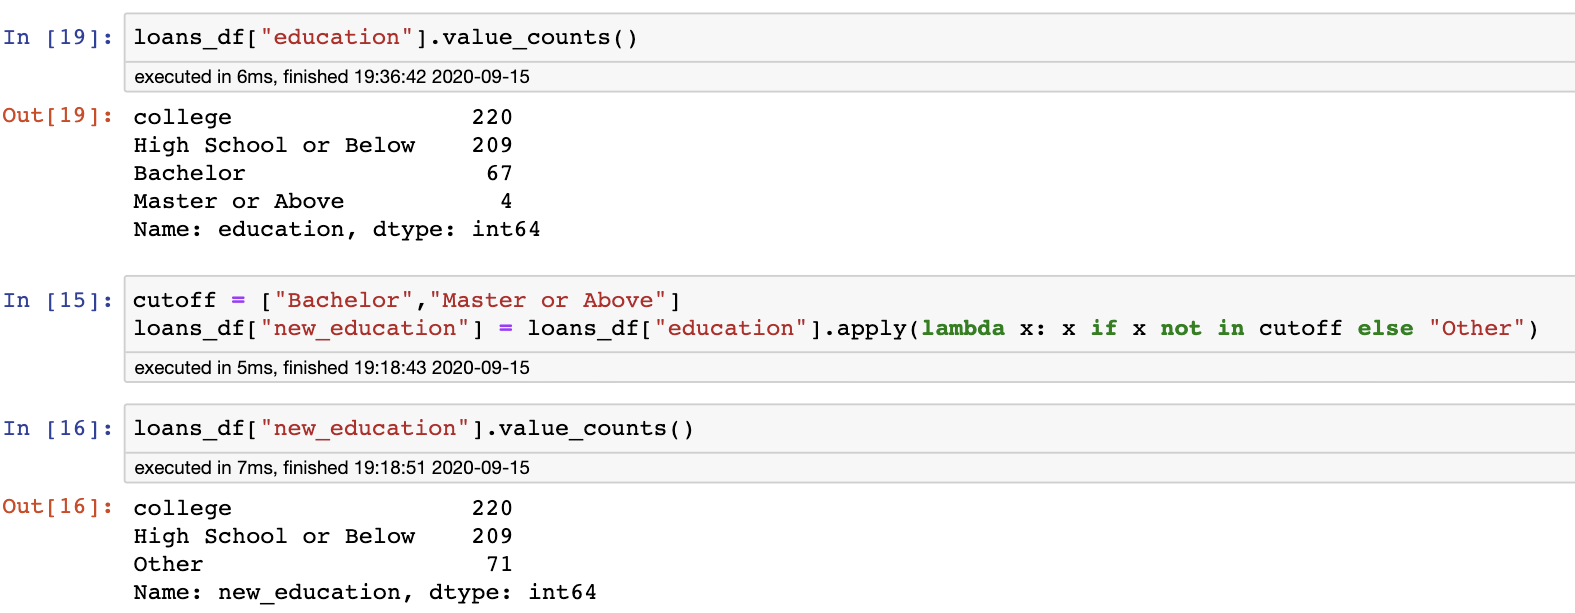